# Importing all Libraries for the Project

In [ ]:
#Import all the Important Packages and Libraries that will be needed to complete
# the Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
%matplotlib inline
sns.set()
warnings.simplefilter('ignore')
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix

# Import the DataSet into this NoteBook

In [ ]:
#Mount the Google Drive Space that the Dataset is Stored On.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the Dataset into the Notebook, on a Pandas DataFrame, from the Drive.
data = pd.read_csv('/content/drive/MyDrive/Analytics Model - Group 44 Data.csv')
#Display the First 10 Rows of the Dataset to Ensure that the Dataset is Correct.
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Data Preprocessing

In [ ]:
#Display the Information about the DataFrame(Basically the Descriptive MetaData 
#of the Dataset)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Display the Dimensions(Number of Rows and Columns) of the DataFrame
data.shape

(6362620, 11)

In [ ]:
#Display the Sum of all Null Values in each Column of the DataFrame
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Display a Description(Important Statistical Properties) of the DataFrame
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Display an Array of Column Labels of the DataFrame.
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
#Display the number of columns that have object, integer, and float data types 
#and stores the names of columns with object data types in 'object_cols', names 
#of columns with integer data types in 'num_cols', and names of columns with 
#float data types in 'fl_cols'.
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


In [ ]:
#Correct an Inconsistency in Column Nomenclature/Naming Convention
data = data.rename(columns={'oldbalanceOrg':'oldbalanceOrig'})

In [ ]:
#Transform Categorical Features to Numeric Format that the Algorithms can Use

#Create an Instance of the LabelEncoder Class
le = LabelEncoder()
#Encode the 'type' column of the DataFrame into Numeric Form by applying the 
#"fit_transform()"" method of the LabelEncoder object 'le'.
data.type = le.fit_transform(data.type)

In [ ]:
#Remove the 'nameDest' and 'nameOrig' Columns from the DataFrame 
#The "inplace=True" Parameter ensures that the Original DataFrame is Modified, 
#not just a copy of it.
data.drop(columns=['nameDest', 'nameOrig'], axis=1, inplace=True)
#Print Information about the Remaining Columns in the DataFrame
data.info()
#Print the Mumber of Rows and Columns in the DataFrame Currently
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrig  float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


(6362620, 9)

In [ ]:
'''
Prepare the Data for the ML Model
First create a New DataFrame 'X' by dropping the 'isFraud' column from the dataframe 
It then creates a series 'Y' containing only the 'isFraud' column of the dataframe 
Create a New Variable 'x' that contains the Standardized Values of the Columns 
in the 'X' DataFrame using the StandardScaler class, which scales the data so 
that it has a mean of 0 and a standard deviation of 1.
'''
X = data.drop('isFraud', axis=1)
Y = data['isFraud']
x = StandardScaler().fit_transform(X)

In [ ]:
#Split the DataSet/DataFrame into Training and Testing Subsets
from sklearn.model_selection import train_test_split

#Split in the 70:30 Ratio
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=1)

#Describe the Training and Testing DataSet
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4453834, 8)
Number transactions y_train dataset:  (4453834,)
Number transactions X_test dataset:  (1908786, 8)
Number transactions y_test dataset:  (1908786,)


# Data Exploration

<Axes: >

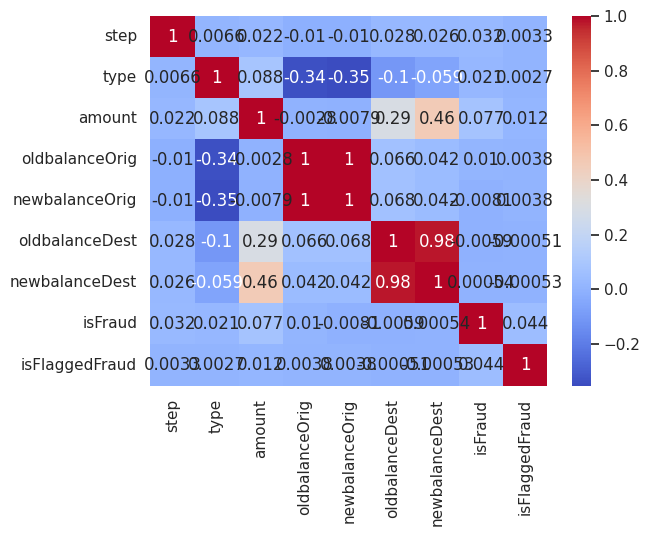

In [ ]:
#Create a Corelation Matrix
corr_matrix = data.corr()

# Create a Heatmap of the Corelation Matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

<Axes: xlabel='type', ylabel='count'>

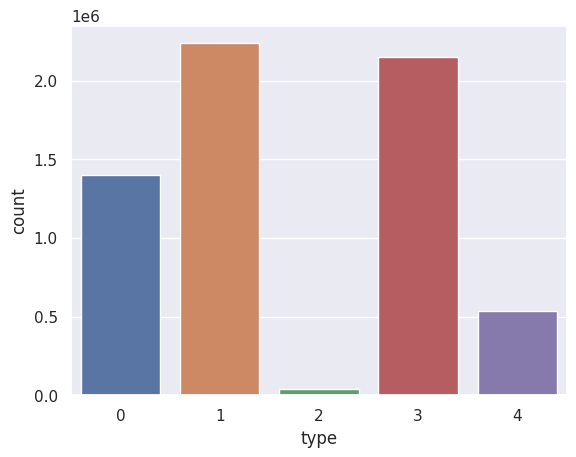

In [ ]:
#Creates a Countplot to Visualize the Number of Occurrences of Each Unique Value in the 'type' Column of the DataFrame.
sns.countplot(x='type', data=data)

<Axes: >

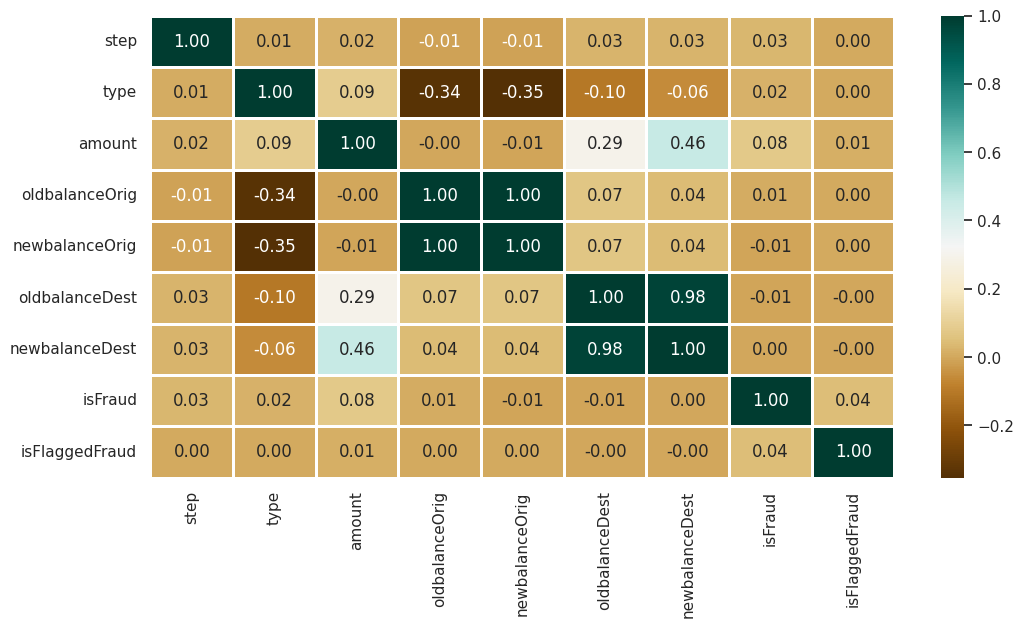

In [ ]:
#Create a Heatmap plot to Visualize the Correlation between all Pairs of Columns
#in the DataFrame, with the Size of the Plot Defined by the Figsize Parameter, 
#using the Color Map 'BrBG', 2 Decimal Points of Precision, and Displaying 
#Annotations of the Correlation Values.
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [ ]:
#Use Principal Component Analysis to Reduce the Dimensionality of 'x' 
#Transform it to 'transformed_data'
#Print the Shape, Percentage of variance explained, and eigenvalues of the 8 
#Principal Components.
from sklearn.decomposition import PCA 
pca = PCA(n_components = 8)

transformed_data = pca.fit_transform(x)
print(transformed_data.shape)
print(pca.explained_variance_ratio_*100)
print(pca.explained_variance_)

(6362620, 8)
[2.90600080e+01 2.61973911e+01 1.25439355e+01 1.24482966e+01
 1.10888124e+01 8.56022975e+00 8.78008016e-02 1.35258898e-02]
[2.32480100e+00 2.09579162e+00 1.00351500e+00 9.95863886e-01
 8.87105131e-01 6.84818488e-01 7.02406523e-03 1.08207135e-03]


0.9998647411021092


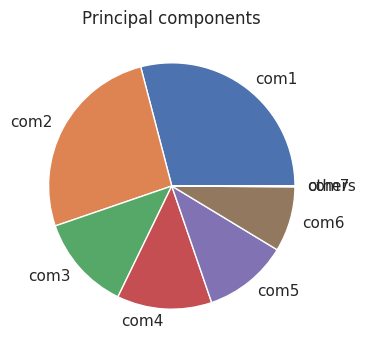

In [ ]:
"""
Calculate the Number of Principal Components Needed to Reach a Threshold 
Percentage of Variance
Print the Sum of Variance Ratios
Create a Pie Chart to Visualize the Percentage of Variance Explained by Each of
the Principal Components.
"""
threshold = 0.95
for_test = 0
order = 0 
for index, ratio in enumerate(pca.explained_variance_ratio_):
    if threshold > for_test:
        for_test += ratio 
    else:
        order = index + 1 
        break 
print(pca.explained_variance_ratio_[:order].sum())
com_col = ['com'+ str(i+1) for i in range(order)]
com_col.append('others')
com_value = [i for i in pca.explained_variance_ratio_[:order]]
com_value.append(1-pca.explained_variance_ratio_[:order].sum())
plt.figure(figsize=[4,4])
plt.pie(x = com_value, labels = com_col)
plt.title('Principal components')
plt.show()

# Handle Imbalance in the Data(using SMOTE)

In [ ]:
#Class Balancing Through SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

#Import SMOTE Module from imblearn Library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

'''
Prints the New Shape of the 'X_train' and 'y_train' Variables after Oversampling
to Balance the Classes of '0' and '1', as well as the Counts of the '1' and '0' 
Labels in the Oversampled Training Set.
'''
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train== 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 5745
Before OverSampling, counts of label '0': 4448089 

After OverSampling, the shape of train_X: (8896178, 8)
After OverSampling, the shape of train_y: (8896178,) 

After OverSampling, counts of label '1': 4448089
After OverSampling, counts of label '0': 4448089


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc1 = accuracy_score(y_test, predictions)
prec1 = precision_score(y_test, predictions )
rec1 = recall_score(y_test, predictions )
f11 = f1_score(y_test, predictions )
print('accuracy:%0.4f'%acc1,'\tprecision:%0.4f'%prec1,'\trecall:%0.4f'%rec1,'\tF1-score:%0.4f'%f11)

accuracy:0.9706 	precision:0.0386 	recall:0.9105 	F1-score:0.0741


In [ ]:
results_testset = pd.DataFrame([['Logistic Regression', acc1,  rec1, prec1, f11]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])

# Confusion Matrix for the Logistic Regression Model

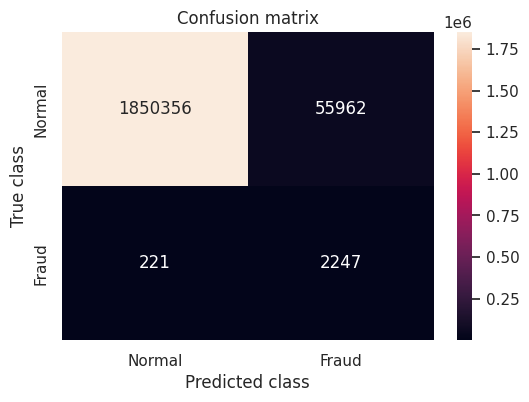

Logistic Regression: 56183
0.9705661085108546
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1906318
           1       0.04      0.91      0.07      2468

    accuracy                           0.97   1908786
   macro avg       0.52      0.94      0.53   1908786
weighted avg       1.00      0.97      0.98   1908786



<Figure size 500x400 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions )
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (predictions  != y_test).sum()
# Run classification metrics
plt.figure(figsize=(5, 4))
print('{}: {}'.format("Logistic Regression", n_errors))
print(accuracy_score(y_test, predictions ))
print(classification_report(y_test, predictions ))

# Random Forest Model

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [ ]:
acc2 = accuracy_score(y_test, y_pred)
prec2 = precision_score(y_test, y_pred)
rec2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc2,'\tprecision:%0.4f'%prec2,'\trecall:%0.4f'%rec2,'\tF1-score:%0.4f'%f12)

accuracy:0.9992 	precision:0.6332 	recall:0.9518 	F1-score:0.7604


In [ ]:
model_results = pd.DataFrame([['Random Forest', acc2,  rec2, prec2, f12]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)

# Confuion Matrix for Random Forest Model

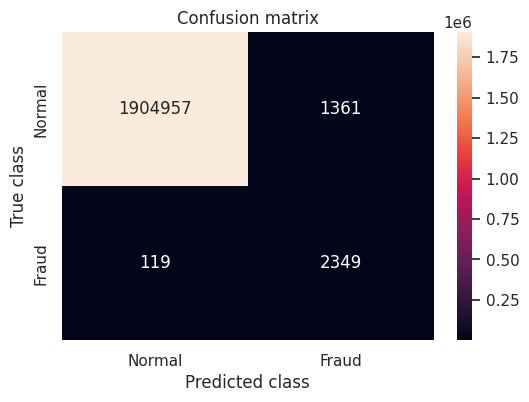

Random Forest: 1480
0.9992246380683848
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.63      0.95      0.76      2468

    accuracy                           1.00   1908786
   macro avg       0.82      0.98      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y_pred != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt= DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

#Export the Decision Tree Model using Pickle
filename = 'decisiontree.pkl'
pickle.dump(dt, open(filename, 'wb'))

In [ ]:
acc3 = accuracy_score(y_test, y_pred_dt)
prec3 = precision_score(y_test, y_pred_dt)
rec3 = recall_score(y_test, y_pred_dt)
f13 = f1_score(y_test, y_pred_dt)
print('accuracy:%0.4f'%acc3,'\tprecision:%0.4f'%prec3,'\trecall:%0.4f'%rec3,'\tF1-score:%0.4f'%f13)

accuracy:0.9994 	precision:0.6789 	recall:0.9672 	F1-score:0.7978


In [ ]:
model_results = pd.DataFrame([['Decision Tree', acc3,  rec3, prec3, f13]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)

# Confusion Matrix for Decision Tree Model

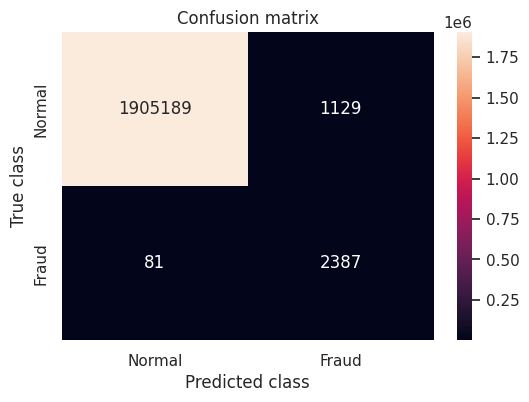

Decision Tree: 1210
0.9993660892315849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.68      0.97      0.80      2468

    accuracy                           1.00   1908786
   macro avg       0.84      0.98      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_dt )
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y_pred_dt  != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Decision Tree", n_errors))
print(accuracy_score(y_test, y_pred_dt ))
print(classification_report(y_test,y_pred_dt ))

# Naive Bayes Model

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian C0.
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y4= gnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc6 = accuracy_score(y_test, y4)
prec6 = precision_score(y_test, y4)
rec6 = recall_score(y_test, y4)
f16 = f1_score(y_test, y4)
print('accuracy:%0.4f'%acc6,'\tprecision:%0.4f'%prec6,'\trecall:%0.4f'%rec6,'\tF1-score:%0.4f'%f16)

accuracy:0.9962 	precision:0.0624 	recall:0.1406 	F1-score:0.0864


In [ ]:
model_results = pd.DataFrame([['Naive Bayes', acc6,  rec6, prec6, f16]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)

# Confusion Matrix for Naive Bayes Model

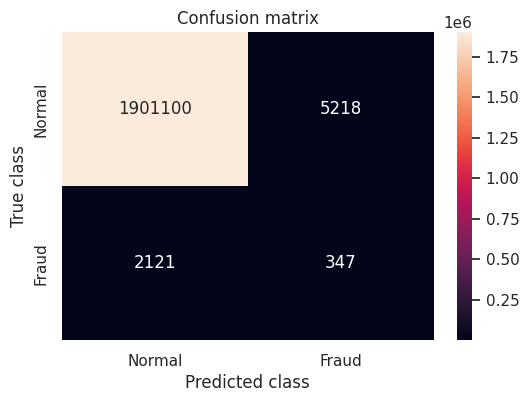

Naive Bayes: 7339
0.9961551478269434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.06      0.14      0.09      2468

    accuracy                           1.00   1908786
   macro avg       0.53      0.57      0.54   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y4)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y4 != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Naive Bayes", n_errors))
print(accuracy_score(y_test, y4))
print(classification_report(y_test, y4))

In [ ]:
results_testset

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.970566,0.910454,0.038602,0.074064
1,Random Forest,0.999225,0.951783,0.633154,0.760440
2,Decision Tree,0.999366,0.967180,0.678896,0.797794
3,Naive Bayes,0.996155,0.140600,0.062354,0.086394


In [ ]:
from xgboost import XGBClassifier

#Create a svm Classifier
clf2  =  XGBClassifier()
 
#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
xgb = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc11 = accuracy_score(y_test, xgb)
prec11 = precision_score(y_test, xgb)
rec11 = recall_score(y_test, xgb)
f111= f1_score(y_test, xgb)
print('accuracy:%0.4f'%acc11,'\tprecision:%0.4f'%prec11,'\trecall:%0.4f'%rec11,'\tF1-score:%0.4f'%f111)

accuracy:0.9980 	precision:0.3955 	recall:0.9903 	F1-score:0.5653


In [ ]:
model_results = pd.DataFrame([['XGBoost', acc11,  rec11, prec11, f111]],
               columns = ['Model', 'Accuracy',  'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)

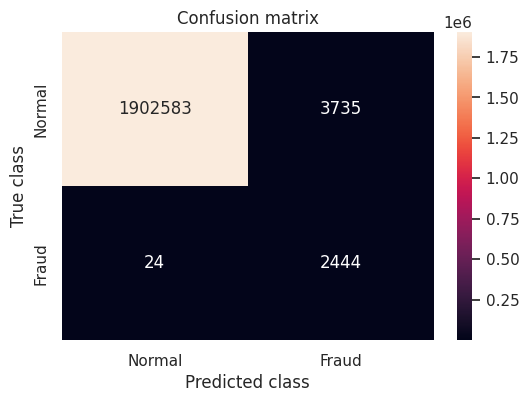

SVM: 3759
0.9980306854723369
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.40      0.99      0.57      2468

    accuracy                           1.00   1908786
   macro avg       0.70      0.99      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (xgb != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("SVM", n_errors))
print(accuracy_score(y_test, xgb))
print(classification_report(y_test, xgb))